In [21]:
import numpy as np

In [22]:
from module import *

In [23]:
from matplotlib import pyplot as plt

In [93]:
data = np.loadtxt('Admission_Predict.csv',delimiter=",", skiprows=1)

In [94]:
#normalización de data 
norm_t_set = np.array([np.zeros(len(data))])
for arr in data.T:
    norm_tuple = []
    for index in range(len(arr)):
        norm_tuple.append((arr[index] - arr.min())/ (arr.max()- arr.min()))
    norm_t_set = np.vstack((norm_t_set, np.array(norm_tuple)))
data = norm_t_set[1:,]
data = data.T

In [95]:
#training set
t_set = data[:240,1:]
#cross validation set
cv_set = data[240:320,1:] 
#test set
test = data[320:,1:]

In [96]:
#slice de data entre matriz de features y vector de variable a predecir
X = np.vstack((
    np.ones(len(t_set)),
    t_set[:,].T
)).T

y = t_set[:,len(t_set[0])-1:len(t_set[0])]

In [97]:
m, n = X.shape
X.shape

(240, 9)

In [98]:
#Después de múltiples generaciones random, se encontró que theta_0 que brindaba los mejores resultados, era:
#theta_0 = np.random.rand(n, 1)
theta_0 = np.array([
 [-0.06706054],
 [ 0.21327747],
 [-0.19349977],
 [ 0.10454866],
 [-0.06015129],
 [ 0.28915204],
 [ 0.27315269],
 [-0.00179598],
 [ 0.50185317]])

In [99]:
theta_0.shape

(9, 1)

In [31]:
theta, costs, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost_regular,
    linear_cost_derivate_regular,
    alpha=0.0001,
    threshold=0.001,
    max_iter=30000,
    lamda=0)

In [32]:
#Cálculo de coeficiente de regresión (R^2)
r2 = (((y-y.mean())**2).sum()-((np.matmul(X, theta)-y)**2).sum())/((y-y.mean())**2).sum()
r2

0.9157459599835907

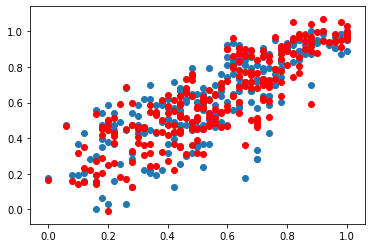

In [33]:
plt.scatter(X[:, 1], y)

plt.scatter(X[:, 1], np.matmul(X, theta), color='red')

plt.show()

### Cross-Validation
Después de obtener el theta que mejor resultados brinda, se realizan las pruebas con el cross-validation set para tunear de mejor manera el modelo. 

In [34]:
cv_set.shape

(80, 8)

In [35]:
cv_x = np.vstack((
    np.ones(len(cv_set)),
    cv_set[:,].T
)).T

cv_y = cv_set[:, 7]

In [ ]:
theta, costs, gradient_norms = gradient_descent(
    cv_x,
    cv_y,
    theta_0,
    linear_cost_regular,
    linear_cost_derivate_regular,
    alpha=0.0001,
    threshold=0.001,
    max_iter=30000,
    lamda=0)

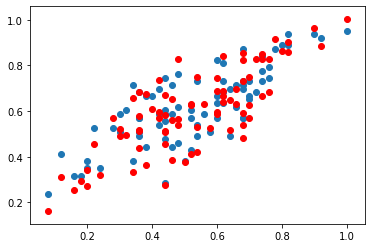

In [36]:
plt.scatter(cv_x[:, 1], cv_y)
plt.scatter(cv_x[:, 1], np.matmul(cv_x, theta), color='red')
plt.show()

In [37]:
#Cálculo de coeficiente de regresión (R^2)
cv_y = cv_set[:,len(cv_set[0])-1:len(cv_set[0])]
r2 = (((cv_y-cv_y.mean())**2).sum()-((np.matmul(cv_x, theta)-cv_y)**2).sum())/((cv_y-cv_y.mean())**2).sum()
r2

0.8867489594770641

In [38]:
#Error Cuadrático Medio

ecm = (1/len(cv_set))*((np.matmul(cv_x, theta)-cv_y)**2).sum()
ecm

0.0030199162867398568

### Gráficas de costo

Con los resultados de R^2 y el Error Cuadrático Medio obtenidos previamente se puede observar que el modelo funciona bastante bien con el set de datos de cross validation. Aún así, se presentarán las gráficas de costo vs. complejidad del modelo y costo vs. lambda para observar si es posible encontrar un mejor modelo. Se definirá como complejidad a la cantidad de features incluídas en el modelo, hasta ahora se ha trabajado con una complejidad de 7. 

In [78]:
#iteración para obtener costo con distintos valores de lambda

#costos para datos de training
t_ecm = np.array([])
t_lamdas = np.linspace(-15, 30, 15)

for l in t_lamdas:
    theta, costs, gradient_norms = gradient_descent(
        X,
        y,
        theta_0,
        linear_cost_regular,
        linear_cost_derivate_regular,
        alpha=0.0001,
        threshold=0.001,
        max_iter=30000,
        lamda=l)
    ecm = (1/len(t_set))*((np.matmul(X, theta)-y)**2).sum()
    t_ecm = np.append(t_ecm, ecm)

In [79]:
#costos para datos de cross validation
cv_ecm = np.array([])
cv_lamdas = np.linspace(-15, 30, 15)

for l in cv_lamdas:
    theta, costs, gradient_norms = gradient_descent(
        cv_x,
        cv_y,
        theta_0,
        linear_cost_regular,
        linear_cost_derivate_regular,
        alpha=0.0001,
        threshold=0.001,
        max_iter=30000,
        lamda=l)
    ecm = (1/len(cv_set))*((np.matmul(cv_x, theta)-cv_y)**2).sum()
    cv_ecm = np.append(cv_ecm, ecm)

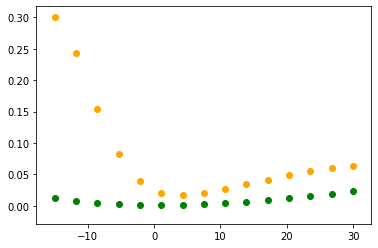

In [80]:
plt.scatter(t_lamdas, t_ecm, color='green')
plt.scatter(cv_lamdas, cv_ecm, color='orange')
plt.show()

#### Se volverán a realizar las gráficas anteriores para poder observar de mejor manera cuál es el lambda más óptimo: 

In [81]:
#costos para datos de training
t_ecm = np.array([])
t_lamdas = np.linspace(0, 8, 10)

for l in t_lamdas:
    theta, costs, gradient_norms = gradient_descent(
        X,
        y,
        theta_0,
        linear_cost_regular,
        linear_cost_derivate_regular,
        alpha=0.0001,
        threshold=0.001,
        max_iter=30000,
        lamda=l)
    ecm = (1/len(t_set))*((np.matmul(X, theta)-y)**2).sum()
    t_ecm = np.append(t_ecm, ecm)

In [82]:
#costos para datos de cross validation
cv_ecm = np.array([])
cv_lamdas = np.linspace(0, 8, 10)

for l in cv_lamdas:
    theta, costs, gradient_norms = gradient_descent(
        cv_x,
        cv_y,
        theta_0,
        linear_cost_regular,
        linear_cost_derivate_regular,
        alpha=0.0001,
        threshold=0.001,
        max_iter=30000,
        lamda=l)
    ecm = (1/len(cv_set))*((np.matmul(cv_x, theta)-cv_y)**2).sum()
    cv_ecm = np.append(cv_ecm, ecm)

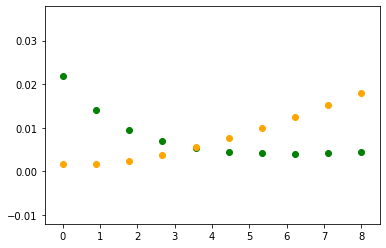

In [83]:
plt.scatter(t_lamdas, t_ecm, color='green')
plt.scatter(cv_lamdas, cv_ecm, color='orange')
plt.show()

El mejor valor de lambda es aproximadamente 3.5. Veamos si usando este lambda se logra mejorar el R^2 y el ECM calculado la primera vez:


In [108]:
theta, costs, gradient_norms = gradient_descent(
    cv_x,
    cv_y,
    theta_0,
    linear_cost_regular,
    linear_cost_derivate_regular,
    alpha=0.0001,
    threshold=0.001,
    max_iter=30000,
    lamda=5)

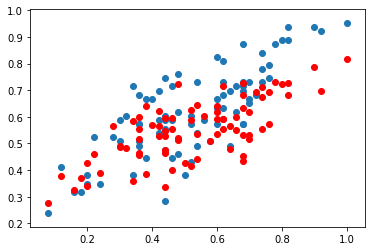

In [109]:
plt.scatter(cv_x[:, 1], cv_y)
plt.scatter(cv_x[:, 1], np.matmul(cv_x, theta), color='red')
plt.show()

In [110]:
#Cálculo de coeficiente de regresión (R^2)
cv_y = cv_set[:,len(cv_set[0])-1:len(cv_set[0])]
r2 = (((cv_y-cv_y.mean())**2).sum()-((np.matmul(cv_x, theta)-cv_y)**2).sum())/((cv_y-cv_y.mean())**2).sum()
r2

0.6236818413683034

In [111]:
#Error Cuadrático Medio

ecm = (1/len(cv_set))*((np.matmul(cv_x, theta)-cv_y)**2).sum()
ecm

0.010034780528287136

In [112]:
print(len(cv_x[0]), len(cv_y[0]))

9 1
